In [1]:
import keras
keras.__version__

'2.15.0'

# Introduction to ConvNets: Classifying handwritten numbers


Let's take a look at a simple example of a convnet. We will use it to classify the MNIST dataset, which is an open dataset containing handwritten numbers.

![Handwritten numbers from the MNIST dataset](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)

Let's create a first basic convnet. It's a stack of 'Conv2D' and 'MaxPooling2D' layers.
The important thing to note is that a convnet takes as input tensors of size `(image_height, image_width, image_channels)`.
To do this we must first find out the size of the images in our dataset.

The network must have the following layers:

- A convolutional layer (Conv2D) with 32 3x3 filters and relu activation. In this first layer you must indicate the size of the input (input_shape).
- A second layer of Max Pooling (MaxPooling2D) of 2x2
- A third convolutional layer with 64 3x3 filters and relu activation
- A fourth layer of 2x2 Max Pooling (MaxPooling2D)
- A fifth convolutional layer of 64 3x3 filters and relu activation

You'll know you've done it right when the model.summary() output is:

![imagen_output.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output.png?raw=true)


In [30]:
import os

from tensorflow.keras import models
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

In [3]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

You can see above that the output of each Conv2D and MaxPooling2D layer is a 3D tensor of dimensions (height, width, channels). The width and height tend to decrease as we go deeper into the network. The number of channels is controlled by the first argument passed to the Conv2D layers (e.g. 32 or 64).

The next step would be to give our last tensor (of dimensions (3, 3, 64)) as input to a densely connected network. These classifiers process vectors, which are 1D, while our output is a 3D tensor. So first we will have to flatten our 3D output and convert it to 1D and then add a few dense layers:

- Add a first layer of 64 neurons
- Add a last layer of 10 neurons (as many as you can sort) and softmax activation
- You'll know you've done well when the summary looks like this:

![imagen_output_flat.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output_flat.png?raw=true)

In [5]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

As you can see, our dimensional output `(3, 3, 64)` has been flattened into a vector of dimension `(576,)`, before entering the two dense layers.

We are now going to train our network with the images from the MNIST dataset.

We then load the dataset and put it into vectors: train_images, train_labels, test_images, test_labels

Before you continue, print:

- What is the size of the training dataset?
- What does the training dataset look like?
- What do the training labels look like?
- Print the fourth image of the training dataset


In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
np.unique(train_images[0])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=uint8)

El conjunto de train tiene 60000 observaciones, que representan imágenes de números escritos a mano. Cada observación es una matriz de tamaño 28 por 28 cuyos elementos toman valores de 0 a 255 según correspondan a distintos tonos de gris en la foto. 

In [10]:
train_labels.shape

(60000,)

In [11]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Las etiquetas toman valores entre 0 y 9 representando los números que hay dibujados en cada una de las imágenes del dataset.

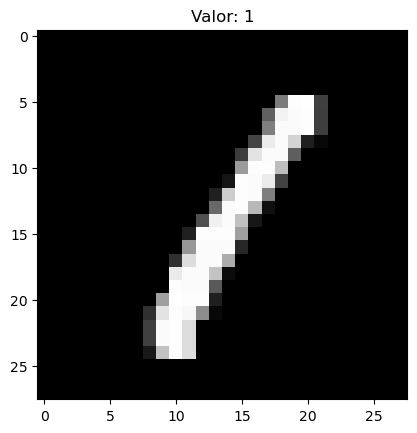

In [21]:
#cuarta foto del dataset de train
sample = np.squeeze(train_images[3, :, :])
plt.imshow(sample,cmap='gray')
plt.title('Valor: {}'.format(train_labels[3]))
plt.show()

Next you will give the appropriate shape to the training and test datasets in order to put them into the neural network. Convert the labels, which right now are numbers, into their categorical form. Check the keras utils manual.

In [22]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

Compile the model indicating what the training data and its labels are. Using the optimizer "rmsprop" and as a loss function use the categorical cross entropy.
Then train the model for 5 epochs and a batch size of 64.

In [23]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=64)


Epoch 1/10


938/938 [==============================] - 19s 19ms/step - loss: 0.1761 - accuracy: 0.9446
Epoch 2/10
938/938 [==============================] - 17s 19ms/step - loss: 0.0489 - accuracy: 0.9851
Epoch 3/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0332 - accuracy: 0.9900
Epoch 4/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0245 - accuracy: 0.9928
Epoch 5/10
938/938 [==============================] - 17s 19ms/step - loss: 0.0197 - accuracy: 0.9941
Epoch 6/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0153 - accuracy: 0.9953
Epoch 7/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0123 - accuracy: 0.9960
Epoch 8/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0100 - accuracy: 0.9965
Epoch 9/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0087 - accuracy: 0.9973
Epoch 10/10
938/938 [==============================] - 16s 17ms/step - loss: 0.

Let's evaluate the model with the test images:

In [24]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0431 - accuracy: 0.9907


Create an image with a handwritting number and check the prediction.

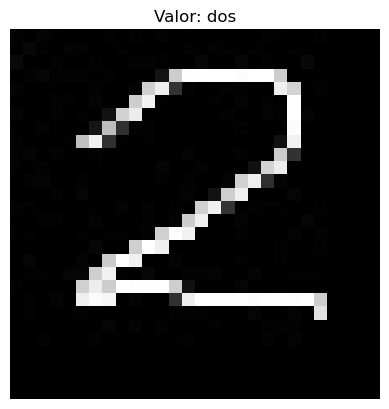

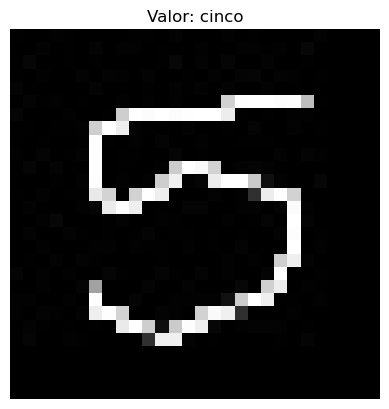

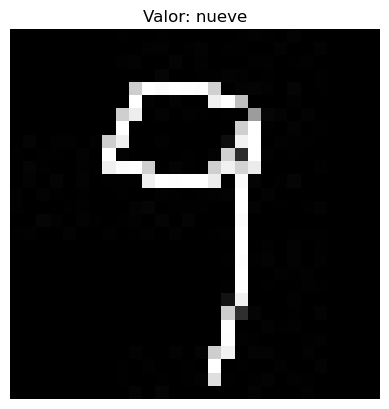

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_width = 28
img_height = 28

numeros = ['dos','cinco','nueve']
for numero in numeros:
    # Cargar la imagen con TensorFlow (use the image generated by you)
    img = tf.keras.preprocessing.image.load_img('{}.jpg'.format(numero), target_size=(img_width, img_height), color_mode="grayscale")
    # Convertir la imagen a un array numpy
    x = tf.keras.preprocessing.image.img_to_array(img)
    # Expandir las dimensiones para que tenga la forma (1, img_width, img_height, 1)
    x = np.expand_dims(x, axis=0)
    
    # Mostrar la imagen
    plt.imshow(x[0, :, :, 0], cmap='gray')
    plt.axis('off')  # Desactivar los ejes
    plt.title('Valor: {}'.format(numero))
    plt.show()

In [29]:
model.save('net_numbers.h5')

Load the model that you just saved and make a prediction with the number you just generated. Try with several numbers ...does it work properly? Explain why do you think this happens.


In [31]:
trained_mod = models.load_model('net_numbers.h5')

In [41]:
numeros = ['dos','cinco','nueve']
for numero in numeros:
    img = tf.keras.preprocessing.image.load_img('{}.jpg'.format(numero),
                                                target_size=(img_width, img_height), color_mode="grayscale")
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    pred_label = trained_mod.predict(x)
    print('Etiqueta real: {}; etiqueta predicha: {}'.format(numero,np.argmax(pred_label)))

1/1 [==============================] - 0s 54ms/step
Etiqueta real: dos; etiqueta predicha: 2
1/1 [==============================] - 0s 25ms/step
Etiqueta real: cinco; etiqueta predicha: 5
1/1 [==============================] - 0s 23ms/step
Etiqueta real: nueve; etiqueta predicha: 9


Se aciertan todas las clasificaciones de los números generados. Como hemos visto antes sobre el conjunto de test, se obtiene un accuracy del 99 \%. En general vemos que el modelo es muy bueno, lo que muestra la eficiencia de las redes convolucionales trabajando con imágenes.